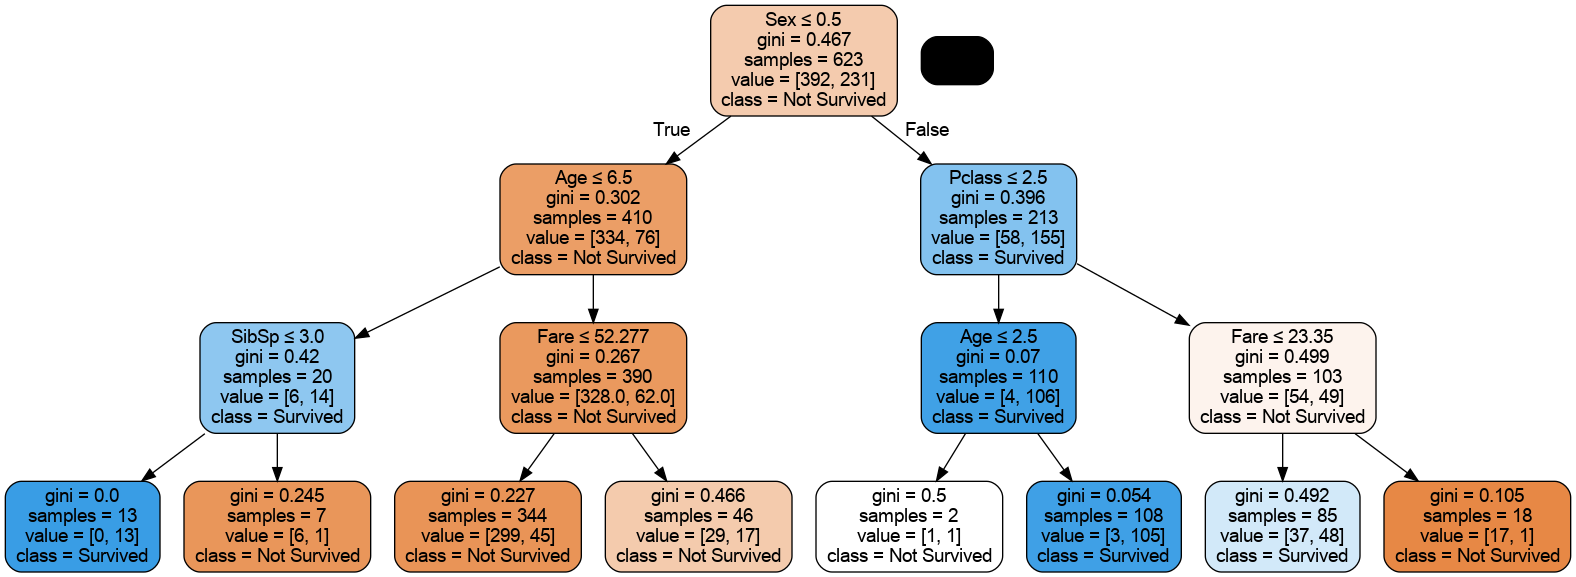

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Preprocess the dataset
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
titanic = titanic[features + ['Survived']]

# Encode categorical variables
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Handle missing values by filling them with the median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Split the dataset
X = titanic[features]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Export the decision tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=features,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Use pydotplus to create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph in a Jupyter Notebook
Image(graph.create_png())

# Save the graph to a file (optional)
# graph.write_png("titanic_decision_tree.png")